# Notebook Imports

In [8]:
from os import walk
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

%matplotlib inline

# Constants

In [9]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'

SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'

SPAM_CAT = 1
HAM_CAT = 0

DATA_JSON_FILE = 'SpamData/01_Processing/email-text-data.json'

# Reading Files

In [10]:
stream = open(EXAMPLE_FILE, encoding='latin-1')
message = stream.read()
stream.close()

print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [11]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [12]:
stream = open(EXAMPLE_FILE, encoding='latin-1')

is_body = False
lines = []

for line in stream:
    if is_body:
        lines.append(line)
    elif line == '\n':
        is_body = True

stream.close()

email_body = '\n'.join(lines)

print(email_body)




Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

# Generator Function

In [13]:
def generate_squares(N):
    for my_number in range(N):
        yield my_number ** 2

In [15]:
# generate_squares(3)
for i in generate_squares(5):
    print(i)
    

0
1
4
9
16


# Email body extraction

In [16]:
def email_body_generator(path):
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding='latin-1')

            is_body = False
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True

            stream.close()

            email_body = '\n'.join(lines)

            yield file_name, email_body

In [17]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_names.append(file_name)
    return pd.DataFrame(rows, index=row_names)

In [18]:
spam_emails = df_from_directory(SPAM_1_PATH, 1)


# out = pd.concat([df, df_extended])
spam_emails = pd.concat([spam_emails, df_from_directory(SPAM_2_PATH,1)])
spam_emails.head()

,MESSAGE,CATEGORY
00181.a9ce64eb710cb3f00a7d7db7911291ab,<html>\n\n<body>\n\n<p>67% of women desire a &...,1
00444.33afc8c1f9cea3100ca8502e8a785259,=============================================\...,1
00082.0341a767bbaca01fd89b6236ef681257,This message is in MIME format. Since your mai...,1
00493.1c5f59825f7a246187c137614fb1ea82,<HR>\n\n<html>\n\n<head>\n\n <title>Secured I...,1
00150.f97c73fa56460a6afc6d9418ad76b5b5,This is a multi-part message in MIME format.\n...,1


In [19]:
spam_emails.shape

(1898, 2)

In [20]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = pd.concat([ham_emails, df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT)])
ham_emails.shape

(3901, 2)

In [21]:
data = pd.concat([spam_emails, ham_emails])
print(data.shape)
data.head()

(5799, 2)


,MESSAGE,CATEGORY
00181.a9ce64eb710cb3f00a7d7db7911291ab,<html>\n\n<body>\n\n<p>67% of women desire a &...,1
00444.33afc8c1f9cea3100ca8502e8a785259,=============================================\...,1
00082.0341a767bbaca01fd89b6236ef681257,This message is in MIME format. Since your mai...,1
00493.1c5f59825f7a246187c137614fb1ea82,<HR>\n\n<html>\n\n<head>\n\n <title>Secured I...,1
00150.f97c73fa56460a6afc6d9418ad76b5b5,This is a multi-part message in MIME format.\n...,1


In [22]:
data.tail()

,MESSAGE,CATEGORY
00023.0e033ed93f68fcb5aab26cbf511caf0e,"On Tue, 2002-08-20 at 12:10, John P. Looney wr...",0
00713.49b7b319d69b2dc2bc27a5dd206750a0,"\n\nIn a message dated 7/23/2002 8:45:18 PM, e...",0
00066.d672dd2baf15f9098ec6f206f6c524ff,"On Fri, Jul 19, 2002 at 04:09:50PM +0100, Ryan...",0
00147.ed6083bcb7c519b09300f3b414ac8912,Paul Jakma's [paul@clubi.ie] 67 lines of wisdo...,0
01023.2c78860c83817efdf8c9ceb1065433cc,Rohit forwards from the NYT:\n\n> Bigger Bar C...,0


# Data Cleaning: Checking for Missing Values

In [23]:
# check if any message bodies are null
data['MESSAGE'].isnull().values.any()

False

In [24]:
# check if there are empty emails (string length zero)
(data.MESSAGE.str.len() == 0).any()

True

In [25]:
(data.MESSAGE.str.len() == 0).sum()

3

In [26]:
# Check the number of entries with null/None values
data.MESSAGE.isnull().sum()

0

### Locate empty emails

In [27]:
type(data.MESSAGE.str.len == 0)

bool

In [28]:
data[data.MESSAGE.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [29]:
data.index.get_loc('00147.ed6083bcb7c519b09300f3b414ac8912')

5797

# Remove System File Entries from Dataframe

In [30]:
data.drop(['cmds'],inplace=True)

In [31]:
data.shape

(5796, 2)

# Add Document IDs to Track Emails in Dataset

In [32]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids

In [33]:
data['FILE_NAME'] = data.index
data = data.set_index('DOC_ID')
data.head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,<html>\n\n<body>\n\n<p>67% of women desire a &...,1,00181.a9ce64eb710cb3f00a7d7db7911291ab
1,=============================================\...,1,00444.33afc8c1f9cea3100ca8502e8a785259
2,This message is in MIME format. Since your mai...,1,00082.0341a767bbaca01fd89b6236ef681257
3,<HR>\n\n<html>\n\n<head>\n\n <title>Secured I...,1,00493.1c5f59825f7a246187c137614fb1ea82
4,This is a multi-part message in MIME format.\n...,1,00150.f97c73fa56460a6afc6d9418ad76b5b5


In [34]:
data.tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5791,"On Tue, 2002-08-20 at 12:10, John P. Looney wr...",0,00023.0e033ed93f68fcb5aab26cbf511caf0e
5792,"\n\nIn a message dated 7/23/2002 8:45:18 PM, e...",0,00713.49b7b319d69b2dc2bc27a5dd206750a0
5793,"On Fri, Jul 19, 2002 at 04:09:50PM +0100, Ryan...",0,00066.d672dd2baf15f9098ec6f206f6c524ff
5794,Paul Jakma's [paul@clubi.ie] 67 lines of wisdo...,0,00147.ed6083bcb7c519b09300f3b414ac8912
5795,Rohit forwards from the NYT:\n\n> Bigger Bar C...,0,01023.2c78860c83817efdf8c9ceb1065433cc


# Save to File using Pandas

In [35]:
data.to_json(DATA_JSON_FILE)

# Number of Spam Messages Visualised (Pie Charts)

In [36]:
data.CATEGORY.value_counts()

CATEGORY
0    3900
1    1896
Name: count, dtype: int64

In [37]:
amount_of_spam = data.CATEGORY.value_counts()[1]
amount_of_ham = data.CATEGORY.value_counts()[0]

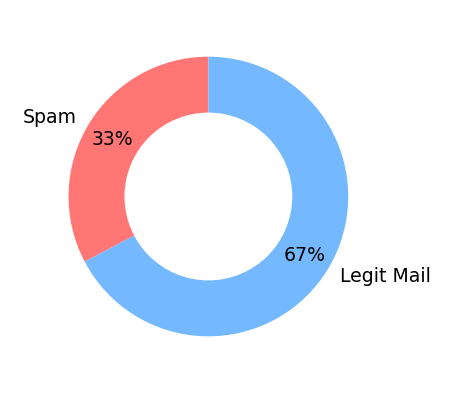

In [67]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]

custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(2,2),dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, autopct='%1.0f%%', colors=custom_colours, 
        pctdistance=0.8)
# draw circle
centre_circle = plt.Circle((0,0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)
plt.show()

In [ ]:
category_names = ['Spam', 'Legit Mail', 'Updates', 'Promotions']
sizes = [25,43,19,22]
# sizes = [amount_of_spam, amount_of_ham]
offset = [0.05, 0.05, 0.05, 0.05]

custom_colours = ['#ff7675', '#74b9ff', '#55efc4','#ffeaa7']

plt.figure(figsize=(2,2),dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, autopct='%1.0f%%', colors=custom_colours, 
        pctdistance=0.8, explode=offset)
# draw circle
centre_circle = plt.Circle((0,0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)
plt.show()

# natural Language Processing
### Text Pre-Processing

In [73]:
# convert to lower case
msg = 'All work an no play makes Jack a dull boy.'
msg.lower()

'all work an no play makes jack a dull boy.'

### Download the NLTK Resources(Tokenizer & Stopwords)